# 2. Feature Engineering

In [1]:
import pandas as pd

from paths import PREPROCESSED_DATA_CSV, ENGINEERED_DATA_CSV, FEATURE_ENG_DIR, TARGETS
from ml_tools.logger import custom_logger
from ml_tools.data_exploration import info
info(full_info=False)

Available functions for data exploration:
1 - load_dataframe
2 - summarize_dataframe
3 - drop_rows_with_missing_data
4 - split_features_targets
5 - show_null_columns
6 - drop_columns_with_missing_data
7 - split_continuous_binary
8 - plot_correlation_heatmap
9 - check_value_distributions
10 - plot_value_distributions
11 - clip_outliers_single
12 - clip_outliers_multi
13 - merge_dataframes
14 - save_dataframe
15 - compute_vif
16 - drop_vif_based


In [2]:
from ml_tools.data_exploration import load_dataframe, summarize_dataframe, show_null_columns, drop_rows_with_missing_data, split_features_targets, split_continuous_binary, drop_columns_with_missing_data, plot_correlation_heatmap, plot_value_distributions, clip_outliers_multi, merge_dataframes, save_dataframe

## 1. Load dataset

In [3]:
raw_df = load_dataframe(df_path=PREPROCESSED_DATA_CSV)

DataFrame shape (3760, 15)


In [4]:
summarize_dataframe(raw_df)

Shape: (3760, 15)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
molecular_weight(g/mol),float64,2657,39,29.34,425.80,202.75,51.00,340.13,392.00,422.00,1667.00
ratio_epoxy,float64,3547,137,5.66,60.21,47.92,0.00,5.50,85.20,100.00,579.00
ratio_curing,float64,3547,267,5.66,23.30,50.33,0.00,1.00,8.00,27.90,1337.70
carbon_fiber_content(%),float64,1352,36,64.04,6.80,18.22,0.00,0.00,0.00,0.00,71.00
filler_proportion(%),float64,2909,178,22.63,12.02,31.94,0.00,0.50,4.09,12.00,900.00
accelerator_content(%),float64,669,22,82.21,1.01,1.26,0.00,0.30,1.00,1.00,7.41
temperature(K),float64,3681,41,2.10,380.68,38.90,295.15,353.15,373.15,403.15,503.15
fracture_toughness(MPa*m0.5),float64,356,166,90.53,2.99,3.84,0.46,1.13,1.56,3.10,21.58
flexural_strength(MPa),float64,1731,894,53.96,177.74,296.44,1.78,79.20,101.00,129.16,3448.40
flexural_modulus(MPa),float64,874,445,76.76,8703.18,21735.75,0.62,2549.25,3000.00,3762.50,190990.00


## 2. Drop samples with too many missing values

In [5]:
full_df = drop_rows_with_missing_data(df=raw_df, threshold=0.7)

Dropping 191 rows with more than 70% missing data.


In [6]:
summarize_dataframe(full_df)

Shape: (3569, 15)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
molecular_weight(g/mol),float64,2653,39,25.67,425.85,202.90,51.00,340.13,392.00,422.00,1667.00
ratio_epoxy,float64,3452,136,3.28,60.94,47.77,0.00,8.00,90.00,100.00,579.00
ratio_curing,float64,3452,258,3.28,23.55,50.83,0.00,1.00,8.80,27.90,1337.70
carbon_fiber_content(%),float64,1351,36,62.15,6.76,18.18,0.00,0.00,0.00,0.00,71.00
filler_proportion(%),float64,2824,164,20.87,12.31,32.37,0.00,0.50,5.00,12.02,900.00
accelerator_content(%),float64,669,22,81.26,1.01,1.26,0.00,0.30,1.00,1.00,7.41
temperature(K),float64,3533,38,1.01,381.30,38.91,298.15,353.15,373.15,403.15,503.15
fracture_toughness(MPa*m0.5),float64,319,153,91.06,3.21,3.99,0.55,1.21,1.63,3.55,21.58
flexural_strength(MPa),float64,1712,886,52.03,175.79,292.63,1.78,78.85,100.79,128.04,3448.40
flexural_modulus(MPa),float64,873,444,75.54,8713.14,21746.21,0.62,2550.00,3000.00,3770.00,190990.00


## 3. Split features and targets

In [7]:
df_targets, df_features = split_features_targets(df=full_df, targets=TARGETS)

Original shape: (3569, 15)
Targets shape: (3569, 8)
Features shape: (3569, 7)


## 4. Check for missing values in columns

In [10]:
target_nulls = show_null_columns(df_targets)
target_nulls

,Missing Count,Missing %
shear_strength(MPa),3349,93.84
fracture_toughness(MPa*m0.5),3250,91.06
flexural_modulus(MPa),2696,75.54
young_modulus(MPa),2492,69.82
impact_strength(kJ/m2),2285,64.02
elongation_at_break(%),2210,61.92
flexural_strength(MPa),1857,52.03
tensile_strength(MPa),511,14.32


In [11]:
feature_nulls = show_null_columns(df_features)
feature_nulls

,Missing Count,Missing %
accelerator_content(%),2900,81.26
carbon_fiber_content(%),2218,62.15
molecular_weight(g/mol),916,25.67
filler_proportion(%),745,20.87
ratio_epoxy,117,3.28
ratio_curing,117,3.28
temperature(K),36,1.01


Save logs

In [12]:
custom_logger(data=target_nulls, save_directory=FEATURE_ENG_DIR, log_name="target_nulls")

Log saved to: /home/karl/epoxy/data/Feature Engineering/target_nulls_20250611_1027.xlsx


In [13]:
custom_logger(data=feature_nulls, save_directory=FEATURE_ENG_DIR, log_name="feature_nulls")

Log saved to: /home/karl/epoxy/data/Feature Engineering/feature_nulls_20250611_1028.xlsx


## 5. Drop features with too many missing values

In [14]:
df_lessnulls_features = drop_columns_with_missing_data(df=df_features, threshold=0.7)

Dropping columns with more than 70% missing data:
['accelerator_content(%)']


## 6. Split continuous and binary features

In [15]:
df_cont, df_binary= split_continuous_binary(df_lessnulls_features)

Continuous columns shape: (3569, 6)
Binary columns shape: (3569, 0)


## 7. Plot correlation heatmaps

Saved correlation heatmap to: /home/karl/epoxy/data/Feature Engineering/Correlation Heatmap of Continuous Features.svg


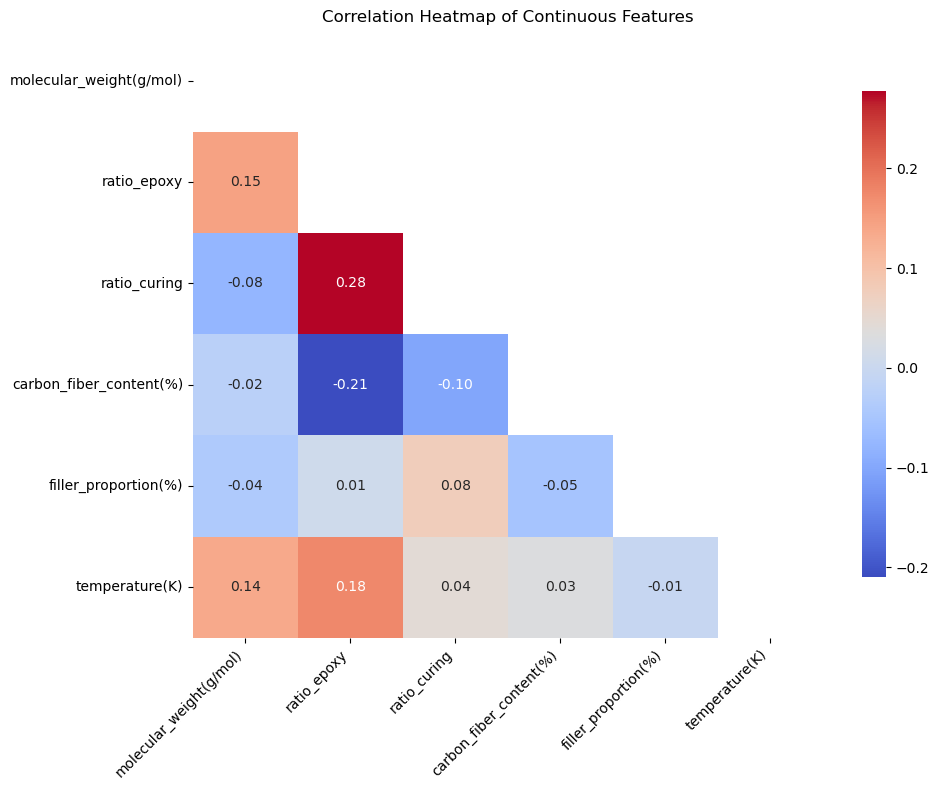

In [16]:
plot_correlation_heatmap(df=df_cont, save_dir=FEATURE_ENG_DIR, plot_title="Correlation Heatmap of Continuous Features")

In [ ]:
plot_correlation_heatmap(df=df_binary, save_dir=FEATURE_ENG_DIR, plot_title="Correlation Heatmap of Binary Features")

## 8. Plot value distributions

In [17]:
plot_value_distributions(df=df_cont, save_dir=FEATURE_ENG_DIR)

Saved 6 plot(s)


In [18]:
plot_value_distributions(df=df_targets, save_dir=FEATURE_ENG_DIR)

Saved 8 plot(s)


## 9. Clip outlier values

## 10. Merge and save datasframe

In [ ]:
# engineered_df = merge_dataframes(df_cont, df_binary, df_targets)
engineered_df = merge_dataframes(df_cont, df_targets)

In [ ]:
save_dataframe(df=engineered_df, save_path=ENGINEERED_DATA_CSV)